In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=597750d22dc7f090c792dee9b9eefc3d


In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


589

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tyret pervaya
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | burica
City not found. Skipping...
Processing Record 4 of Set 1 | hit
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | faanui
Processing Record 7 of Set 1 | phan rang
City not found. Skipping...
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | talcahuano
Processing Record 10 of Set 1 | atar
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | kaitangata
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | tocopilla
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | ostrovnoy
Processing Record 20 of Set 1 | port shepstone
Processing Record 21 of Set 1 | carnarvon
P

Processing Record 34 of Set 4 | barkhan
Processing Record 35 of Set 4 | ust-tsilma
Processing Record 36 of Set 4 | pisco
Processing Record 37 of Set 4 | olafsvik
Processing Record 38 of Set 4 | praia
Processing Record 39 of Set 4 | almaznyy
Processing Record 40 of Set 4 | gaozhou
Processing Record 41 of Set 4 | north bend
Processing Record 42 of Set 4 | aksarka
Processing Record 43 of Set 4 | rungata
City not found. Skipping...
Processing Record 44 of Set 4 | sept-iles
Processing Record 45 of Set 4 | makat
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | ust-karsk
Processing Record 48 of Set 4 | agirish
Processing Record 49 of Set 4 | esperance
Processing Record 50 of Set 4 | honningsvag
Processing Record 1 of Set 5 | makakilo city
Processing Record 2 of Set 5 | rajampet
Processing Record 3 of Set 5 | hvide sande
Processing Record 4 of Set 5 | kerewan
Processing Record 5 of Set 5 | lavrentiya
Processing Record 6 of Set 5 | booue
Processing Record 7 of Set 5 | imbit

Processing Record 24 of Set 8 | astaneh-ye ashrafiyeh
Processing Record 25 of Set 8 | ko samui
Processing Record 26 of Set 8 | port macquarie
Processing Record 27 of Set 8 | yulara
Processing Record 28 of Set 8 | colonelganj
Processing Record 29 of Set 8 | mayo
Processing Record 30 of Set 8 | redlands
Processing Record 31 of Set 8 | sur
Processing Record 32 of Set 8 | bongaree
Processing Record 33 of Set 8 | marawi
Processing Record 34 of Set 8 | bulawayo
Processing Record 35 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 36 of Set 8 | pedra branca
Processing Record 37 of Set 8 | rafai
Processing Record 38 of Set 8 | lamu
Processing Record 39 of Set 8 | meulaboh
Processing Record 40 of Set 8 | magelang
Processing Record 41 of Set 8 | qurbus
Processing Record 42 of Set 8 | broken hill
Processing Record 43 of Set 8 | benghazi
Processing Record 44 of Set 8 | san policarpo
Processing Record 45 of Set 8 | san carlos de bariloche
Processing Record 46 of Set 8 | phrai bun

Processing Record 11 of Set 12 | yanji
Processing Record 12 of Set 12 | artyom
Processing Record 13 of Set 12 | santa cruz
Processing Record 14 of Set 12 | palaikastron
Processing Record 15 of Set 12 | carauari
Processing Record 16 of Set 12 | kansanshi
Processing Record 17 of Set 12 | bargal
City not found. Skipping...
Processing Record 18 of Set 12 | mezen
Processing Record 19 of Set 12 | honiara
Processing Record 20 of Set 12 | shubarshi
Processing Record 21 of Set 12 | raga
Processing Record 22 of Set 12 | san andres
Processing Record 23 of Set 12 | mahadday weyne
City not found. Skipping...
Processing Record 24 of Set 12 | mizdah
Processing Record 25 of Set 12 | evensk
Processing Record 26 of Set 12 | vardo
Processing Record 27 of Set 12 | muros
Processing Record 28 of Set 12 | campos belos
Processing Record 29 of Set 12 | tinskoy
Processing Record 30 of Set 12 | kiruna
Processing Record 31 of Set 12 | akdepe
Processing Record 32 of Set 12 | danbury
Processing Record 33 of Set 12 

In [9]:
len(city_data)

535

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tyret Pervaya,53.6703,102.3106,23.52,90,100,3.56,RU,2021-12-08 03:25:00
1,Chuy,-33.6971,-53.4616,63.05,76,0,10.00,UY,2021-12-08 03:25:01
2,Hit,33.6416,42.8251,56.75,51,100,9.75,IQ,2021-12-08 03:25:01
3,Ushuaia,-54.8000,-68.3000,42.46,56,20,9.22,AR,2021-12-08 03:23:02
4,Faanui,-16.4833,-151.7500,80.80,73,33,2.08,PF,2021-12-08 03:25:01
5,Rikitea,-23.1203,-134.9692,75.13,61,94,18.19,PF,2021-12-08 03:25:02
6,Talcahuano,-36.7167,-73.1167,55.08,88,0,6.91,CL,2021-12-08 03:25:02
7,Atar,20.5169,-13.0499,69.51,13,100,12.15,MR,2021-12-08 03:25:02
8,Kaitangata,-46.2817,169.8464,64.92,79,98,0.76,NZ,2021-12-08 03:25:03
9,Georgetown,5.4112,100.3354,85.95,62,20,11.50,MY,2021-12-08 03:20:58


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tyret Pervaya,RU,2021-12-08 03:25:00,53.6703,102.3106,23.52,90,100,3.56
1,Chuy,UY,2021-12-08 03:25:01,-33.6971,-53.4616,63.05,76,0,10.00
2,Hit,IQ,2021-12-08 03:25:01,33.6416,42.8251,56.75,51,100,9.75
3,Ushuaia,AR,2021-12-08 03:23:02,-54.8000,-68.3000,42.46,56,20,9.22
4,Faanui,PF,2021-12-08 03:25:01,-16.4833,-151.7500,80.80,73,33,2.08
5,Rikitea,PF,2021-12-08 03:25:02,-23.1203,-134.9692,75.13,61,94,18.19
6,Talcahuano,CL,2021-12-08 03:25:02,-36.7167,-73.1167,55.08,88,0,6.91
7,Atar,MR,2021-12-08 03:25:02,20.5169,-13.0499,69.51,13,100,12.15
8,Kaitangata,NZ,2021-12-08 03:25:03,-46.2817,169.8464,64.92,79,98,0.76
9,Georgetown,MY,2021-12-08 03:20:58,5.4112,100.3354,85.95,62,20,11.50


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1638935760.935256

In [16]:
today = time.strftime("%x")
today

'12/07/21'

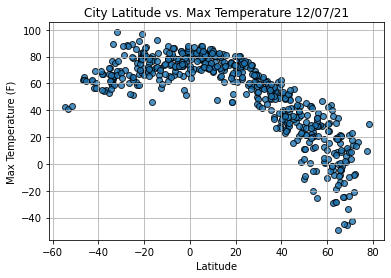

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

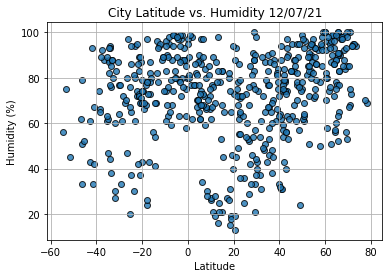

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


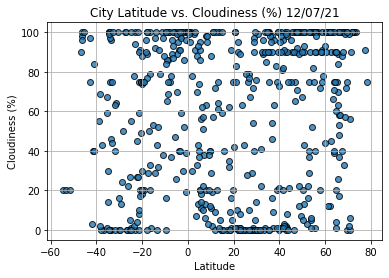

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

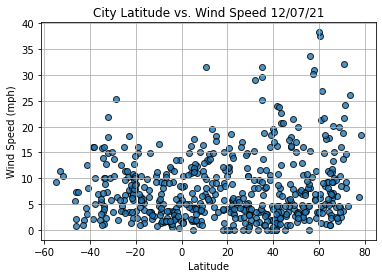

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()